## Combined orders, products, and categories tables, grouped by category and product, and calculated total sales per group to identify top-performing products and categories.

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
order_details = pd.read_csv("order_details.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
categories = pd.read_csv ("categories.csv")

In [176]:
product_name = products [["product_name", "product_id", "category_id"]]

In [177]:
df_product = pd.merge (order_details, product_name, on = "product_id", how="inner")

In [178]:
df_product["sales"] = df_product["quantity"] * df_product["unit_price"]

In [179]:
sales_by_product_name = df_product.groupby("product_name").agg(
    total_sales=("sales", "sum")
).reset_index().sort_values("total_sales", ascending=False)

In [180]:
sales_by_product_name.head(5)

,product_name,total_sales
11,Côte de Blaye,149984.2
68,Thüringer Rostbratwurst,87736.4
51,Raclette Courdavault,76296.0
3,Camembert Pierrot,50286.0
66,Tarte au sucre,49827.9


In [181]:
categories_name = categories [["category_name", "category_id"]]

In [182]:
df_products_categories = pd.merge (categories_name, product_name, on ="category_id")

In [183]:
df_orders = pd.merge (df_products_categories, order_details, on = "product_id")

In [184]:
df["c_sales"] = df_orders ["quantity"] * df_orders ["unit_price"]

In [185]:
df_orders["c_sales"] = df_orders["quantity"] * df_orders["unit_price"]
category_sales = df_orders.groupby("category_name").agg(
    total_sales=("c_sales", "sum"),
    total_orders=("order_id", "nunique")
).reset_index().sort_values("total_sales", ascending=False)

In [186]:
#Total data analysis as per Category. 
category_sales

,category_name,total_sales,total_orders
0,Beverages,286526.95,354
3,Dairy Products,251330.50,303
5,Meat/Poultry,178188.80,161
2,Confections,177099.10,295
7,Seafood,141623.09,291
1,Condiments,113694.75,193
6,Produce,105268.60,129
4,Grains/Cereals,100726.80,182


/var/folders/v0/33sslsb12pj66r9jd7w9cg9h0000gn/T/ipykernel_75442/1480490504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


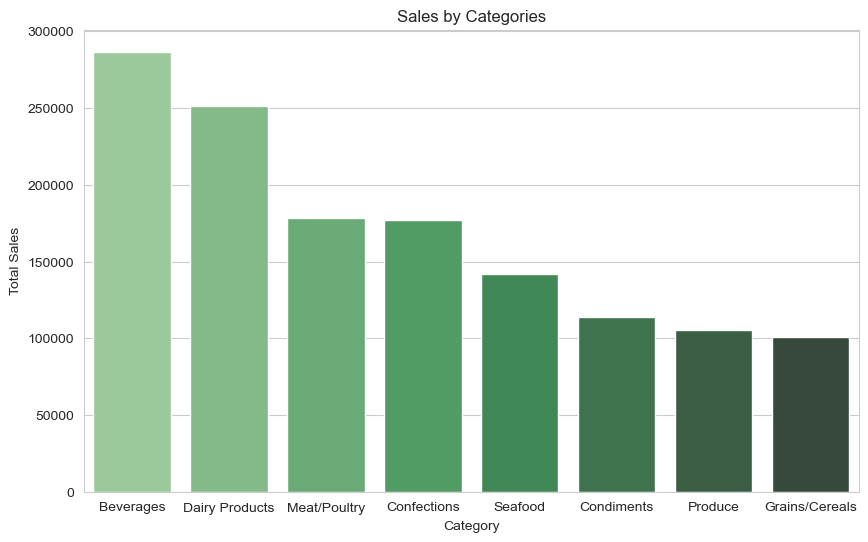

In [187]:
#Visualizing sales per Categories
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    data=category_sales,
    x='category_name',
    y='total_sales', 
    palette="Greens_d"
)
plt.title("Sales by Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()